# Trivia

## Heaviside theta

In [1]:
import numpy as np
import pylab as pl
from numpy.fft import fft, ifft, fftshift, fftfreq, fft2, ifft2

%matplotlib inline

In [2]:
def HTheta(x):
    return (x>=0)*1

In [3]:
x = np.arange(-10,10,.01)

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


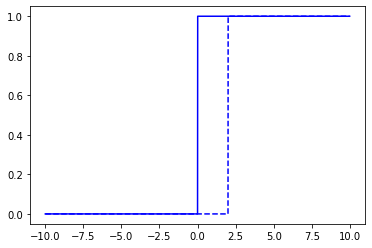

In [4]:
pl.plot(x, HTheta(x), 'b-')
pl.plot(x, HTheta(x-2), 'b--')

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


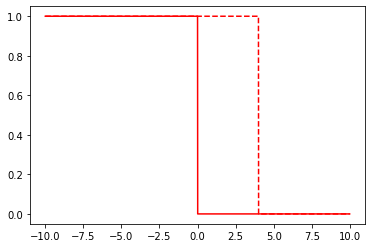

In [5]:
pl.plot(x, HTheta(-x), 'r-')
pl.plot(x, HTheta(-(x-4)), 'r--')

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


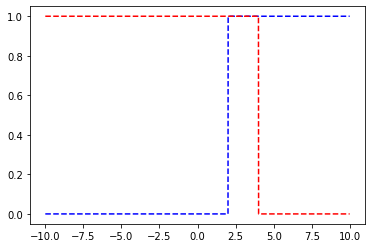

In [6]:
pl.plot(x, HTheta((x-2)), 'b--')
pl.plot(x, HTheta(-(x-4)), 'r--')

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


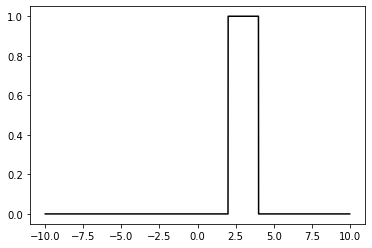

In [7]:
pl.plot(x, HTheta((x-2))*HTheta(-(x-4)), 'k-')

In [8]:
def Slit(x, a):
    return HTheta(x+a/2)*HTheta(-(x-a/2))

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


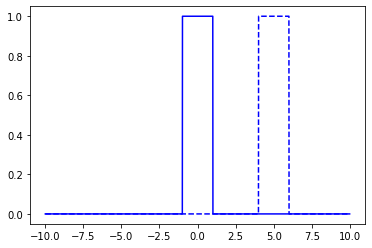

In [9]:
pl.plot(x, Slit(x,2), 'b-')
pl.plot(x, Slit(x-5,2), 'b--')

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


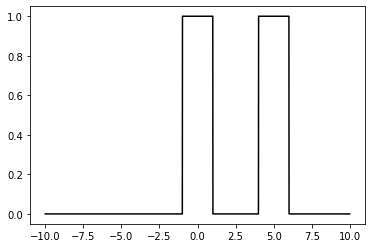

In [10]:
pl.plot(x, Slit(x,2) + Slit(x-5,2), 'k-')

In [11]:
def Grating(x, a,b):
    x1 = 0*x
    for x0 in np.arange(min(x), max(x)+a+b, a+b):
        x1 = x1 + Slit(x-x0, a)
    return x1

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


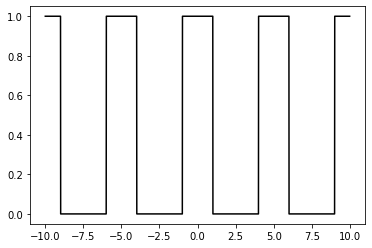

In [12]:
a, b = 2, 3
pl.plot(x, Grating(x, a,b), 'k-')

In [13]:
# Using FFT to calculate integrals

In [14]:
def f(x):
    return np.exp(1j*x) + np.exp(1j*5*x)

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


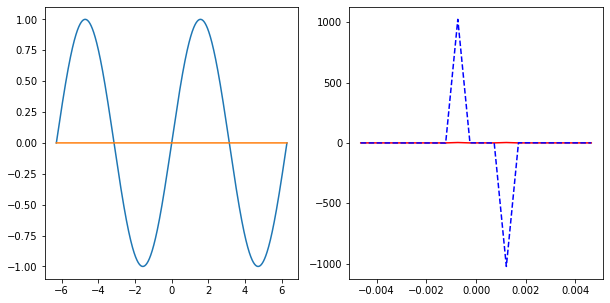

In [15]:
x = np.linspace(-2*np.pi, 2*np.pi, 2048, endpoint=True)
y = np.sin(x)

fft_y = fftshift(fft(y))
k = np.linspace(np.pi/x[0], np.pi/x[-1], len(x), endpoint=True)

pl.figure(figsize=(10,5))
pl.subplot(1,2,1)
pl.plot(x,y.real)
pl.plot(x,y.imag)


pl.subplot(1,2,2)
n=10;
n1 = len(x)//2-n
n2 = n1+2*n
pl.plot(k[n1:n2],fft_y[n1:n2].real,'r')
pl.plot(k[n1:n2],fft_y[n1:n2].imag, 'b--')
#pl.plot(k[n1:n2],np.abs(fft_y[n1:n2]), 'g')

In [16]:
L = (x[-1]-x[0])
nrange = np.arange(len(x))-len(x)/2
t2 = (L/(np.pi*np.array(list(range(-len(x)//2,0))+[1/np.pi]+list(range(1,len(x)//2)))*1j ))
t2 = t2*(t2.real==np.inf)*L + t2*(t2.real!=np.inf)
sum(fft_y*t2*np.exp(1j*np.pi*nrange*x/L))

(-4092.6507438905983-24.37460647678362j)

/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


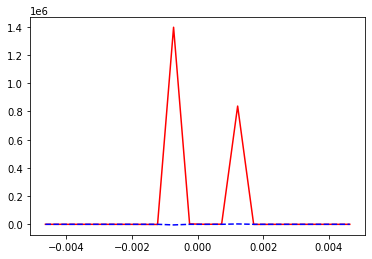

In [17]:
pl.plot(k[n1:n2],(fft_y[n1:n2]/(-k[n1:n2]*1j)).real,'r')
pl.plot(k[n1:n2],(fft_y[n1:n2]/(-k[n1:n2]*1j)).imag, 'b--')

In [18]:
k

array([-0.5       , -0.49951148, -0.49902296, ...,  0.49902296,
        0.49951148,  0.5       ])

In [19]:
def Slit(x, x0=0, w=1):
    return 1*(np.abs(x-x0)<=w/2)

def Slit2(x, y, x0=0, y0=0, wx=1, wy=1):
    XX, YY = np.meshgrid(x,y)
    return 1*(np.abs(XX-x0)<=wx/2)

def RectAperture(x, y, x0=0, y0=0, wx=1, wy=1):
    XX, YY = np.meshgrid(x,y)
    return 1*(np.abs(XX-x0)<=wx/2)*(np.abs(YY-y0)<=wy/2)

def CircularAperture(x, y, x0=0, y0=0, r=1):
    XX, YY = np.meshgrid(x,y)
    return 1*(np.abs(XX-x0)**2+np.abs(YY-y0)**2<=r**2)


/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/opt/pypy3/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


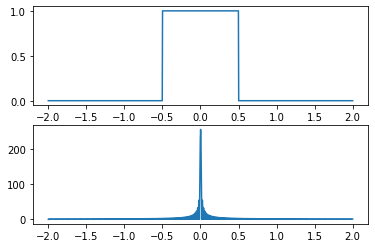

In [20]:
x = np.linspace(-2,2,1024)
pl.figure()
pl.subplot(2,1,1)
pl.plot(x, Slit(x, x0=0, w=1))
pl.subplot(2,1,2)
pl.plot(x, np.abs(fftshift(fft(Slit(x)))))

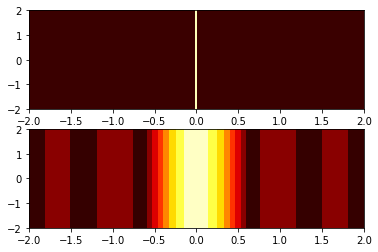

In [21]:
x = np.linspace(-2,2,2**11)
y = np.linspace(-2,2,2**11)
z = Slit2(x,y, x0=0, y0=0, wx=0.01, wy=1)
pl.figure()
pl.subplot(2,1,1)
pl.contourf(x,y, z, cmap='hot')
pl.subplot(2,1,2)
pl.contourf(x,y, np.abs(fftshift(fft(z))), cmap='hot')

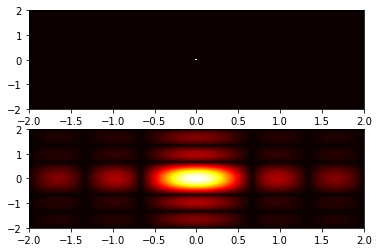

In [22]:
x = np.linspace(-2,2,2**11)
y = np.linspace(-2,2,2**11)
z = RectAperture(x,y, x0=0, y0=0, wx=0.01, wy=0.01)
pl.figure()
pl.subplot(2,1,1)
pl.contourf(x,y, z, cmap='hot', levels=100)
pl.subplot(2,1,2)
pl.contourf(x,y, np.abs(fftshift(fft2(z))), cmap='hot', levels=100)

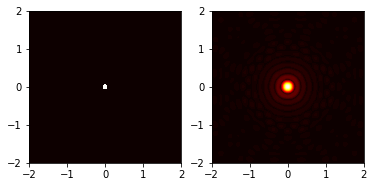

In [28]:
# Circular aperture

x = np.linspace(-2,2,2**10)
y = np.linspace(-2,2,2**10)
z = CircularAperture(x,y, x0=0, y0=0, r=.05)
fig = pl.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_aspect(aspect=max(y)/max(x))
pl.contourf(x,y, z, cmap='hot', levels=100)
ax2 = fig.add_subplot(1,2,2)
ax2.set_aspect(aspect=max(y)/max(x))
pl.contourf(x,y, np.abs(fftshift(fft2(z))), cmap='hot', levels=100)

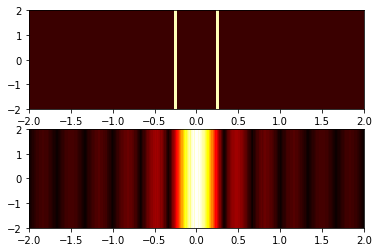

In [24]:
# double slit
x = np.linspace(-2,2,2**11)
y = np.linspace(-2,2,2**11)
z = Slit2(x,y, x0=-0.25, y0=0, wx=0.025, wy=1) + Slit2(x,y, x0=0.25, y0=0, wx=0.025, wy=1)
pl.figure()
pl.subplot(2,1,1)
pl.contourf(x,y, z, cmap='hot')
pl.subplot(2,1,2)
pl.contourf(x,y, np.abs(fftshift(fft(z))), cmap='hot', levels = 100)